<a href="https://colab.research.google.com/github/18520076Khiem/CS114.K21/blob/master/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danh sách thành viên



18521404 Lê Đại Thành

18520076 Trần Đỗ Quốc Khiêm

185212394 Nguyễn Hoàng Thắng

# Mô tả bài toán
Phát biểu bài toán: Dựa vào tiêu đề của một bài báo, đưa ra dự đoán liệu nó có phải là một bài báo châm biếm hay không.

Data: Lấy các tiêu đề bài báo có tính châm biếm từ trang web theOnion. Tiêu đề bài báo không có tính châm biếm lấy tại trang web HUFFPOST

Input: Tiêu đề của bài báo.

Output: Bài báo có tính châm biếm hay không

# Lấy datasets trên Kaggle

In [113]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"trandoquockhiem","key":"94f23ee7b4ed300f910aada801fc5b46"}'}

In [114]:
!pip install kaggle

In [115]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [116]:
!kaggle datasets list -s headlines

ref                                                  title                                          size  lastUpdated          downloadCount  
---------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  
therohk/million-headlines                            A Million News Headlines                       20MB  2020-04-27 13:07:30           1276  
rmisra/news-headlines-dataset-for-sarcasm-detection  News Headlines Dataset For Sarcasm Detection    3MB  2019-07-03 23:52:57           9582  
therohk/india-headlines-news-dataset                 India Headlines News Dataset                   68MB  2019-04-12 02:46:04           1990  
aaron7sun/stocknews                                  Daily News for Stock Market Prediction          6MB  2019-11-13 18:22:52           4172  
rmisra/news-category-dataset                         News Category Dataset                          25MB  2018-12-02 04:09:45          11495  

In [117]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

news-headlines-dataset-for-sarcasm-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [118]:
!unzip news-headlines-dataset-for-sarcasm-detection.zip

Archive:  news-headlines-dataset-for-sarcasm-detection.zip
replace Sarcasm_Headlines_Dataset.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Sarcasm_Headlines_Dataset_v2.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [119]:
ls

 drive/
'kaggle (1).json'
 kaggle.json
 news-headlines-dataset-for-sarcasm-detection.zip
 sample_data/
 Sarcasm_Headlines_Dataset.json
 Sarcasm_Headlines_Dataset_v2.json


In [120]:
import pandas as pd
df1=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
df2=pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)

In [121]:
df=pd.concat([df1,df2],axis=0,sort=False)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


# Lấy dữ liệu cột Headline và cột Is_sarcastic

In [122]:
X=df['headline']
y=df['is_sarcastic']

# Biểu đồ thống kê số tiêu đề là châm biếm và không châm biếm

Text(0.5, 1.0, 'Data Distribution')

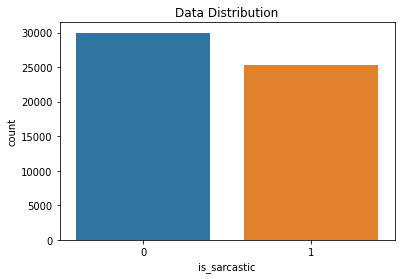

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "is_sarcastic", data = df)
plt.title("Data Distribution")

# Tiền xử lí dữ liệu

## Stopword là gì? 

Stopword là những từ trong câu khi mất đi không gây ảnh hưởng đến nghĩa của câu.
 

Những stopword này đã được thống kê trong corpus của thư viện nltk.

In [124]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Xóa những stopwords ra khỏi data:

In [125]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

stop_words =set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import PorterStemmer 

def preprocess(text):
  word_list = []
  tok = tokenizer.tokenize(text)
  for word in tok:
    if word not in stop_words:
      word_list.append(stemmer.stem(word))
  return " ".join(word_list)

 

Tiến hành xóa những stopwords ra khỏi Data

In [126]:
x_data = X.apply(preprocess)
x_data.tail()


28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci g...
28616          beauti accept speech week came queer korean
28617    mar probe destroy orbit spielberg gate space p...
28618                                dad clarifi food stop
Name: headline, dtype: object

## Xử lí dữ liệu chuyển đổi ngôn ngữ tự nhiên thành  thành ma trận các tính năng TF-IDF 

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_data_tfidf=vectorizer.fit_transform(x_data)
x_data_tfidf

<55328x17940 sparse matrix of type '<class 'numpy.float64'>'
	with 394323 stored elements in Compressed Sparse Row format>

## Chia dữ liệu thành 80% để train 20% để test

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data_tfidf, df['is_sarcastic'].values, test_size=0.10, random_state=42)

## Chọn model để train cho data

In [129]:
from sklearn.linear_model import LogisticRegression
LogModel = LogisticRegression()
LogModel.fit(X_train,y_train)
print(f"Training Score : {LogModel.score(X_train, y_train)}")
print(f"Test Score : {LogModel.score(X_test, y_test)}")


Training Score : 0.8903504367908425
Test Score : 0.8449304174950298


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Scrap dữ liệu từ 2 trang web :** 
  - HuffPost : non-sarcastic
  - TheOnion : sarcastic

####**import thư viện :**
  - Request : gửi yêu cầu đến url
  - urlopen : mở url
  - BeautifulSoup : lấy headline từ các thẻ trong source của url

In [130]:
from urllib.request import Request , urlopen 
from bs4 import BeautifulSoup

####**Scrap dữ liệu từ trang HuffPost**
- Ý tưởng : Scrap dữ liệu từng tab trong mục News của trang HuffPost UK
- Thực hiện :
  - Sử dụng vòng for để kiểm soát số tab cần scrap để tránh dữ liệu quá ít hoặc quá nhiều
  - Sau khi tìm được url của website cần scrap thì ta sẽ gửi yêu cầu đến url đó 
  - Tiếp đến mở url vừa được yêu cầu
  - Sử dụng BeautifullSoup để lấy source của website vừa mới được mở 
  - Một đoạn code chứa headline : **Judge Rejects White House Demand To Block John Bolton's New Book**

      ```<a class="card__link yr-card-headline" href="/entry/john-bolton-white-house-trump-book_uk_5eee269bc5b697d43e591553?utm_hp_ref=uk-news" target="_self" data-cpid="0d6874cb-8dbc-355e-89b3-76c1cbedf86a" data-rapid-pos="2" data-ylk="cpos:18;pos:2;elm:hdln;g:0d6874cb-8dbc-355e-89b3-76c1cbedf86a" data-rapid-sec="{&quot;col2&quot;:&quot;col2&quot;}" data-rapid-elm="hdln" data-rapid-g="0d6874cb-8dbc-355e-89b3-76c1cbedf86a" data-rapid_p="37" data-v9y="1">Judge Rejects White House Demand To Block John Bolton's New Book</a>```

  - Sau khi lấy được source của web, ta quan sát thấy các headline của trang này nằm trong thẻ <\a> với class_name = card__link yr-card-headline 
  - Vì thế ta dùng hàm find_all của thư viện BeautifullSoup để lấy ra tất các thẻ này
  - Tiếp theo ta tách headline bằng hàm text 
  - Cuối cùng kiểm tra xem headline vừa mới lấy ra có nằm trong Data chưa , nếu chưa thì đẩy nó và label của dữ liệu này là 0 vào data
- Kết quả : từ 50 tab của mục News ta lấy được 1600 headline

In [133]:
# scrap data form HuffPost
huff_data = []

# sử dụng vòng lặp để load trang tiếp theo trong phần news 
for i in range(50):

  # định dạng url của phần news trong trang HuffPost với i tương ứng với số trang
  url = 'https://www.huffingtonpost.co.uk/news/'+ str(i) +'/?guccounter=2'

  # gửi request HTTP 1.1 đến url với header tự chỉnh 
  req = Request(url,headers={'User-Agent': 'ScrapData/3.0'})

  # mở url với thời gian chờ là 10s 
  page = urlopen(req,timeout=10)

  # sử dụng BeautifulSoup để lấy source của website với định dạng văn bản html
  soup = BeautifulSoup(page,"html.parser")

  # sử dụng hàm find_all để tìm tất cả thẻ a có name_class : card__link yr-card-headline
  headlines = soup.find_all('a',attrs={'class':'card__link yr-card-headline'})

  # tách headline từ thẻ và gán label cho nó 
  for hl in range(len(headlines)):

    # hàm text sẽ lấy ra phần text trong thẻ 
    headline = headlines[hl].text

    # kiểm tra headline có tồn tại trong data chưa 
    if headline not in huff_data:
      data = [headline,0]
      huff_data.append(data)

In [134]:
print(huff_data[:10])
print(len(huff_data))

[['Coronavirus Means These People Will Be On Mental Health Waiting Lists For Nearly A Year', 0], ['Health Leaders Say UK Must Start Preparing For Second Covid-19 Wave', 0], ['Government Announces £85m To Help Rough Sleepers Through Coronavirus Pandemic', 0], ["Boris Johnson's Sign Language Interpreter Gives Up And 'Goes For A Drink' While PM Speaks", 0], ['Oxford University: 12 Colleges Take In Five Or Fewer Black Undergraduates In Three Years', 0], ["'Walk Of Shame': Deflated Trump's Lonely Helicopter Walk Becomes Biting New Meme", 0], ['Nigel Farage Allowed To Attend Trump Rally With A ‘National Interest’ Travel Ban Waiver', 0], ['A US City Will Tonight Decide Whether To Change Its Name Over Links To Slavery', 0], ["Burnley Condemns 'White Lives Matter’ Banner Flown Above Manchester City Ground", 0], ['Drinkers Barricade Themselves Inside Liverpool Pub After Police Attempt To End Lock-In', 0]]
1600


####**Scrap dữ liệu từ trang TheOnion**
- Ý tưởng : tương tự trang HuffPost lấy dữ liệu của từng tab của mục News-in-Brief
- Thực hiện : 
   - Khá giống với scrap dữ liệu của trang HuffPost
   - Tuy nhiên phần url của tab mới có dạng url gốc + 1 chuỗi ứng với tab đó 
   - Code của một More-Stroies button:

    ```<a class="sc-1out364-0 hMndXN js_link" data-ga="[[&quot;Story type page click&quot;,&quot;More stories click&quot;]]" href="?startTime=1592331480884" rel="next"><button class="j48i5d-2 fUFqcv button button--tertiary"><div class="j48i5d-1 fuDdQ"><span class="j48i5d-0 keLEgo">More stories</span><span class="iyvn34-0 bYIjtl"><svg xmlns="http://www.w3.org/2000/svg" width="18" height="18" aria-label="ChevronRight icon" viewBox="0 0 18 18"><path fill-rule="evenodd" d="M6.16 14.13a.5.5 0 1 0 .68.74l6-5.5a.5.5 0 0 0 0-.74l-6-5.5a.5.5 0 1 0-.68.74L11.76 9l-5.6 5.13z"></path></svg></span></div></button></a>```

   - Từ đây có thể thấy tail_url tab tiếp theo nằm trong href (?startTime=1592331480884)
   - Ta có thể tìm thông qua thẻ a và class_name = sc-1out364-0 hMndXN js_link tuy nhiên khi quan sát source có rất nhiều thẻ với class_name như vậy
   - Vì thế ta sẽ tìm thông qua data-ga="[[&quot;Story type page click&quot;,&quot;More stories click&quot;]]"
   -Từ đó có thể dùng hàm get('href') để lấy tail_url
   - Kiểm tra và đẩy dữ liệu vào data với label = 1
- Kết quả : sau khi scrap 80 tab ta cũng thu được 1600 headline 

In [ ]:
# scrap dữ liệu từ trang onion
onion_data= []

# đuôi url của mỗi tab 
tail_url = ''

# Sử dụng vòng lặp để scrap từng tab
for i in range(80):
  # url có định dạng url gốc của mục news-in-brief cộng với tail_url của mỗi tab, tab đầu tiên có đuôi trong từ tab 2 đuôi url sẽ ứng với 1 chuỗi số 
  url = 'https://www.theonion.com/c/news-in-brief' + tail_url

  # gửi yêu cầu đến url
  req = Request(url, headers={'ScrapData':'XYZ/3.0'})

  # mở url
  page = urlopen(req,timeout=10)

  # lấy source của web
  soup = BeautifulSoup(page,'html.parser')

  # tìm tất cả thẻ h2 với class_name = sc-759qgu-0 cYlVdn cw4lnv-6 eXwNRE
  headlines = soup.find_all('h2',attrs={'class':'sc-759qgu-0 cYlVdn cw4lnv-6 eXwNRE'})

  # tách headline và gắn label
  for hl in range(len(headlines)):

    # tách headline 
    headline = headlines[hl].text

    # kiểm tra headline có tồn tại trong data chưa 
    if headline not in onion_data:
      data = [headline,1]
      onion_data.append(data)

  # lấy tail_url của tab tiếp theo nằm trong href của thẻ a với data-ga = [["Story type page click","More stories click"]]
  # sử dụng hàm get('href') để lấy dữ liệu của href 
  tail_url = str(soup.find('a',attrs={'data-ga':'[["Story type page click","More stories click"]]'}).get('href'))

In [ ]:
print(onion_data[:10])
print(len(onion_data))

#**Ghi dữ liệu vào file CSV**
- Mount đến drive để lấy tệp cần ghi vào
- Dùng thư viện csv để chuyển data từ dạng list sang csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# impor thư viện csv
import csv

# các header của dữ liệu
Headers = [[ "Headline", "label"]]

# mở tệp Headlines_Data trong Drive với chế độ ghi
with open('/content/drive/My Drive/Sarcasm/Headline_sarcasm.xlsx', 'w', newline='') as file:
  # Sử dụng hàm writer để thực hiện ghi vào file   
    writer = csv.writer(file)

  # sử dụng wrirerows để ghi thành nhiều cột 
    

    # ghi onion data
    writer.writerows(onion_data)

    # ghi huffpost data
    writer.writerows(huff_data)

In [135]:
import pandas as pd
dataf=pd.read_csv('/content/drive/My Drive/Sarcasm/Headline_sarcasm.xlsx',header=None)
dataf.columns=['headline','is_sacartic']
print(dataf)

                                               headline  is_sacartic
0     Realtor Thinks Flourishing Neighborhood Full O...            1
1     Study Finds Gap Widening Between Rich Pets And...            1
2     Heavily Armed Self-Help Gurus Demand America R...            1
3     White House Announces Entire U.S. Populace Of ...            1
4     Facebook Announces Plan To Break Up U.S. Gover...            1
...                                                 ...          ...
3195  Arsenal Head Coach Mikel Arteta Tests Positive...            0
3196  Coronavirus Hides The Budget In Plain Sight, W...            0
3197  Justin Trudeau Self-Isolates As Wife Tested Fo...            0
3198    Two New Coronavirus Deaths Confirmed In England            0
3199  Donald Trump Caught Swearing On Mic Before Ann...            0

[3200 rows x 2 columns]


In [136]:
dataf = dataf.sample(frac=1).reset_index(drop=True)
print(dataf)

                                               headline  is_sacartic
0     World Leaders Eagerly Await As G7 Organizers A...            1
1     Opinion: Britain's Record On Racism Is No Less...            0
2     Pete Buttigieg Admits Only Recently Realizing ...            1
3     252 More Coronavirus Deaths Recorded In Englan...            0
4     US Intelligence Agencies Conclude Coronavirus ...            0
...                                                 ...          ...
3195  Flag-Bearer Accidentally Video-Bombs BBC Inter...            0
3196  Stabbing Of Asian American Toddler And Family ...            0
3197  No New Coronavirus Deaths In Reported In Scotl...            0
3198  God Cleans Cosmos After Discovering Universe I...            1
3199  Jay Inslee Smashes Through Wall Of Town Hall I...            1

[3200 rows x 2 columns]


In [137]:
x1_test=dataf['headline'].apply(preprocess)
x1_test

0       world leader eagerli await As G7 organ announc...
1       opinion britain record On racism Is No less bl...
2       pete buttigieg admit onli recent realiz black ...
3       252 more coronaviru death record In england sc...
4         US intellig agenc conclud coronaviru not manmad
                              ...                        
3195    flag bearer accident video bomb bbc interview ...
3196    stab Of asian american toddler and famili deem...
3197    No new coronaviru death In report In scotland ...
3198    god clean cosmo after discov univers infest wi...
3199    jay insle smash through wall Of town hall In s...
Name: headline, Length: 3200, dtype: object

In [138]:
x1_test_tfidf = vectorizer.transform(x1_test)
x1_test_tfidf

<3200x17940 sparse matrix of type '<class 'numpy.float64'>'
	with 29135 stored elements in Compressed Sparse Row format>

In [139]:
print(x1_test_tfidf)

  (0, 17686)	0.19978190433247273
  (0, 15607)	0.3168729900017014
  (0, 12800)	0.3918991299780488
  (0, 11316)	0.27692111806776165
  (0, 10943)	0.379111299696448
  (0, 9096)	0.2450898411851659
  (0, 6392)	0.41131336589186124
  (0, 4875)	0.2884746560097957
  (0, 1311)	0.35014570736629125
  (0, 923)	0.22497939657048396
  (1, 13001)	0.324543658421805
  (1, 12780)	0.3920746442125783
  (1, 11280)	0.388841622355125
  (1, 9188)	0.35257730471987514
  (1, 2295)	0.4251548842562387
  (1, 1976)	0.44967853439317207
  (1, 827)	0.28718089101391575
  (2, 17211)	0.2685485686379167
  (2, 12972)	0.34094587192575787
  (2, 12931)	0.29374065082146156
  (2, 11887)	0.3951774656050431
  (2, 11818)	0.23164527804250412
  (2, 2616)	0.42009120421408586
  (2, 2513)	0.4381422526946191
  (2, 1897)	0.24908151917947996
  :	:
  (3197, 4199)	0.2773342233066158
  (3197, 2499)	0.25030918313692674
  (3197, 344)	0.21547323833713664
  (3198, 16739)	0.31077729012281247
  (3198, 8045)	0.46189630762092143
  (3198, 6712)	0.2901019

In [140]:
y1_test=dataf['is_sacartic']
y1_test.shape

(3200,)

# Đối chiếu performance của model trên dataset đã cho và trên 2000 headine mới

In [141]:
print(f"Test Score : {LogModel.score(X_test, y_test)}")
print(f"New Test Score  : {LogModel.score(x1_test_tfidf, y1_test)}")

Test Score : 0.8449304174950298
New Test Score  : 0.7440625


## Nhận xét: performance test trên 2000 headlines tự cào thấp hơn nhiều đối với test_set trên datasets có sẵn: 74% ~ 84%

## Viết ứng dụng

In [160]:
print('nhap vao headline can kiem tra!!!')
Headline_str = input()
Headline_list = [Headline_str]
df_app = pd.DataFrame(Headline_list)

Test_app = df_app[0].apply(preprocess)
Test_app_tfidf = vectorizer.transform(Test_app)

result_app = LogModel.predict(Test_app_tfidf)

if result_app:
  print("Sarcasic")
else:
  print("None-Sarcasic")

nhap vao headline can kiem tra!!!
'Total Pandemonium': Trump’s Abrupt European Travel Ban Sows Chaos
None-Sarcasic
